In [2]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

# EXERCISES:

1) Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

2) Load the mpg dataset and use it to answer the following questions:

    a. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
    b. Are compact cars more fuel-efficient than the average car?
    c. Do manual cars get better gas mileage than automatic cars?

#### #1 Ace Realty

- compare average time selling homes is different at 2 offices
- office 1: sample size = 40, mean= 90, stddev = 15
- office 2: sample size= 50, mean= 100, stddev = 20
- alpha = .05

##### first, see what kinds of data you're comparing. 
- average time (numeric/continious) vs two offices (distinct/categorical)

##### second, decide what you'll be using
- One sample t-test or 2 sample t-test?
- on tailed or 2 tailed?

In [48]:
# this will be:
# a 2 sample t-test- comparing two offices
# a 2 tailed- want to know if the average is larger OR smaller in either office

#### Step 1: plot distribution

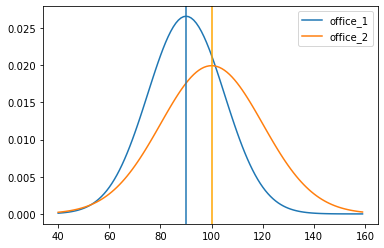

In [74]:
x= np.arange(40,160)

#y=stats.norm(mean, stddev).pdf(x)

y1 = stats.norm(90,15).pdf(x) #this gives graph for office 1
y2 = stats.norm(100,20).pdf(x) #this gives graph for office 2

plt.plot(x, y1, label='office_1')
plt.plot(x,y2, label = 'office_2')
plt.axvline(90)
plt.axvline(100, color='orange')

plt.legend()

In [67]:
avg_y1 = np.mean(y1)
avg_y1

0.008330155453183524

In [68]:
avg_y2= np.mean(y2)
avg_y2

0.008310788879259125

#### Step 2: Set Hypothesis
- $H_0$: There is no diffence in mean selling time between the two offices
- $H_a$: There is a diffence in mean selling time between the two offices   

#### Step 3: Set Alpha

In [44]:
alpha = .05

#### Step 4: Verify Assumption
- samples are independent = YES, two seperate data sets
- normal distribution = YES, sample sizes are 50 and 40
- equal variance = False

In [46]:
y1.var(), y2.var()
#this shows the variance is not the same. must set variance to false

(3.4209403914107914e-05, 1.0818496127286657e-05)

#### Step 5: Compute Test Statistics

In [ ]:
# 2 sample. 2 tailed

In [62]:
t, p = stats.ttest_ind_from_stats(100,20, 50, 90,15, 40)
#t, p = stats.ttest_ind_from_stats(100,20, 50, 90,15, 40)
t, p, alpha

(2.6252287036468456, 0.01020985244923939, 0.05)

In [63]:
p < alpha

True

#### Step 6: Decide

we reject our $H_0$, there is a difference in average selling time between the two offices.

______________________________________________________

#### 2) Load the mpg dataset 

In [ ]:
df = sns.load_dataset('mpg')

In [6]:
df.origin.value_counts()
#more than 30

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [35]:
df.head()
#get a sneakpeek

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


#### a. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [32]:
ninenine_fuel = df[df.model_year == '99'].mpg
oeight_fuel = df[df.model_year == '08'].mpg

<AxesSubplot:>

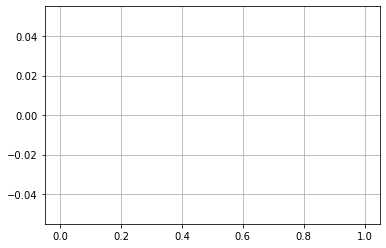

In [30]:
## PLOT
ninenine_fuel.hist()